# Notebook de exploração dos métodos de CLusterização

## TL;DR
Dentro deste notebook vamos explorar os tipos de notebooks existentes.

## Objetivo

Entender como executar cada método com os tipos de dados que temos.

## Dados
CSV's dos trials.


## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.



# Tipos de Métodos de Clusterização 


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Bloco 1 - K-Means tradicional com distância Euclidiana

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
# Bloco 2 - K-Means com distância DTW (tslearn)
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance



In [119]:
df_original = pd.read_csv('../../data/rafaelDB.csv')

### Plot dos dados

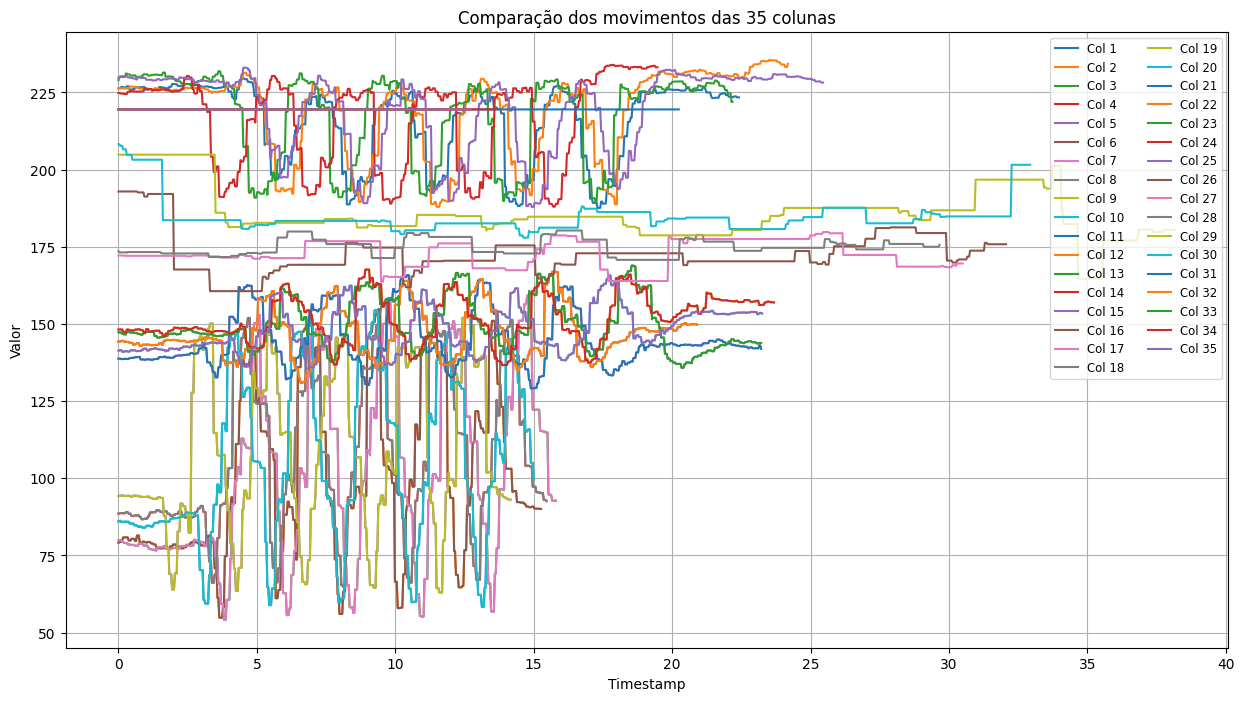

In [120]:
# Visualização dos dados.
# Suponha que df é seu DataFrame e a coluna 0 é timestamp
timestamp = df_original.iloc[:, 0]

plt.figure(figsize=(15, 8))

# Plota as colunas 1 a 35
for i in range(1, 36):
    plt.plot(timestamp, df_original.iloc[:, i], label=f'Col {i}')

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Comparação dos movimentos das 35 colunas')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

### Tratamento dos tamanhos das séries


In [121]:
# Separa timestamp e sensores
timestamp = df_original.iloc[:, 0]
dados = df_original.iloc[:, 1:]

# Conta valores não nulos (validos) por coluna (sensor)
valid_lengths = dados.notna().sum(axis=0)

# Identifica o menor tamanho válido
min_length = valid_lengths.min()

print(f"Menor tamanho válido: {min_length}")

# Corta todas as colunas para o menor tamanho
dados_cortados = dados.iloc[:min_length, :]

# Corta o timestamp também para manter alinhamento
timestamp_cortado = timestamp.iloc[:min_length]

# Reconstroi DataFrame final
df_final = pd.concat([timestamp_cortado.reset_index(drop=True), dados_cortados.reset_index(drop=True)], axis=1)

print(df_final.shape)
print(df_final.head())

Menor tamanho válido: 344
(344, 36)
   timestamp   Vol1Ex1   Vol1Ex2   Vol1Ex3   Vol1Ex4   Vol1Ex5   Vol2Ex1  \
0     0.0000  86.05160  79.04637  79.92158  88.55168  94.18597  144.2986   
1     0.0334  86.05160  79.42403  79.92158  88.55168  94.36861  144.2986   
2     0.0668  86.24536  79.42403  79.92158  88.72372  94.36861  144.2986   
3     0.1002  85.88944  79.42403  79.92158  88.72372  94.36861  144.4738   
4     0.1336  85.88944  79.89925  79.41667  88.72372  94.40106  144.5396   

    Vol2Ex2   Vol2Ex3   Vol2Ex4  ...   Vol6Ex1   Vol6Ex2   Vol6Ex3   Vol6Ex4  \
0  138.7671  147.3392  148.2097  ...  192.9248  172.1902  173.6004  204.8451   
1  138.7671  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
2  138.7671  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
3  138.6201  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
4  138.6201  146.8200  148.2097  ...  192.9248  172.1767  173.1956  204.8451   

    Vol6Ex5   Vol7Ex1   Vo

In [122]:
df_original = df_final.T
df_original

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
timestamp,0.00000,0.03340,0.06680,0.10020,0.13360,0.16700,0.20040,0.23380,0.26720,0.30060,...,11.15560,11.18900,11.22240,11.25580,11.28920,11.32260,11.35600,11.38940,11.42280,11.45620
Vol1Ex1,86.05160,86.05160,86.24536,85.88944,85.88944,85.88944,85.92782,85.92782,85.92782,85.91203,...,97.68756,97.68756,120.90460,120.90460,120.90460,118.33170,118.33170,118.33170,117.49330,117.49330
Vol1Ex2,79.04637,79.42403,79.42403,79.42403,79.89925,80.83653,80.83653,80.83653,80.84084,80.84084,...,145.50160,145.50160,145.96920,145.96920,145.96920,147.59070,147.59070,147.59070,151.48710,151.48710
Vol1Ex3,79.92158,79.92158,79.92158,79.92158,79.41667,79.41667,79.02091,79.02091,79.02091,79.02091,...,67.34228,92.91782,92.91782,95.54456,95.54456,95.54456,101.32170,101.32170,101.32170,101.32170
Vol1Ex4,88.55168,88.55168,88.72372,88.72372,88.72372,88.67191,88.67191,88.67191,89.01524,89.01524,...,102.45950,102.45950,143.90810,143.90810,143.90810,148.16040,148.16040,148.04590,148.04590,148.04590
Vol1Ex5,94.18597,94.36861,94.36861,94.36861,94.40106,94.40106,94.40106,94.27642,94.27642,94.27642,...,106.65020,106.43960,96.67354,96.67354,92.09328,92.09328,92.09328,85.34341,85.34341,85.34341
Vol2Ex1,144.29860,144.29860,144.29860,144.47380,144.53960,144.53960,144.25480,144.25480,144.25480,144.16310,...,147.24300,147.24300,147.24300,143.39720,143.87740,143.87740,143.87740,143.87740,143.87740,143.67800
Vol2Ex2,138.76710,138.76710,138.76710,138.62010,138.62010,138.62010,138.68090,138.68090,138.68090,138.66650,...,140.78490,140.78490,141.18620,141.18620,141.18620,142.17100,142.17100,142.17100,143.61320,143.61320
Vol2Ex3,147.33920,147.23790,147.23790,147.23790,146.82000,146.82000,146.61340,146.61340,146.61340,147.48220,...,145.04020,147.01930,147.01930,147.01930,146.99450,146.99450,146.99450,153.51360,153.51360,153.51360
Vol2Ex4,148.20970,148.20970,148.20970,148.20970,148.20970,147.52790,147.31900,147.31900,147.31900,148.18790,...,145.90460,145.98290,145.98290,146.30200,146.30200,146.30200,145.76400,145.76400,145.76400,145.76400


## Bloco 1 - K-Means tradicional (distância Euclidiana)

C:\Users\Yama\AppData\Local\Temp\ipykernel_9524\173295308.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', n_clusters)


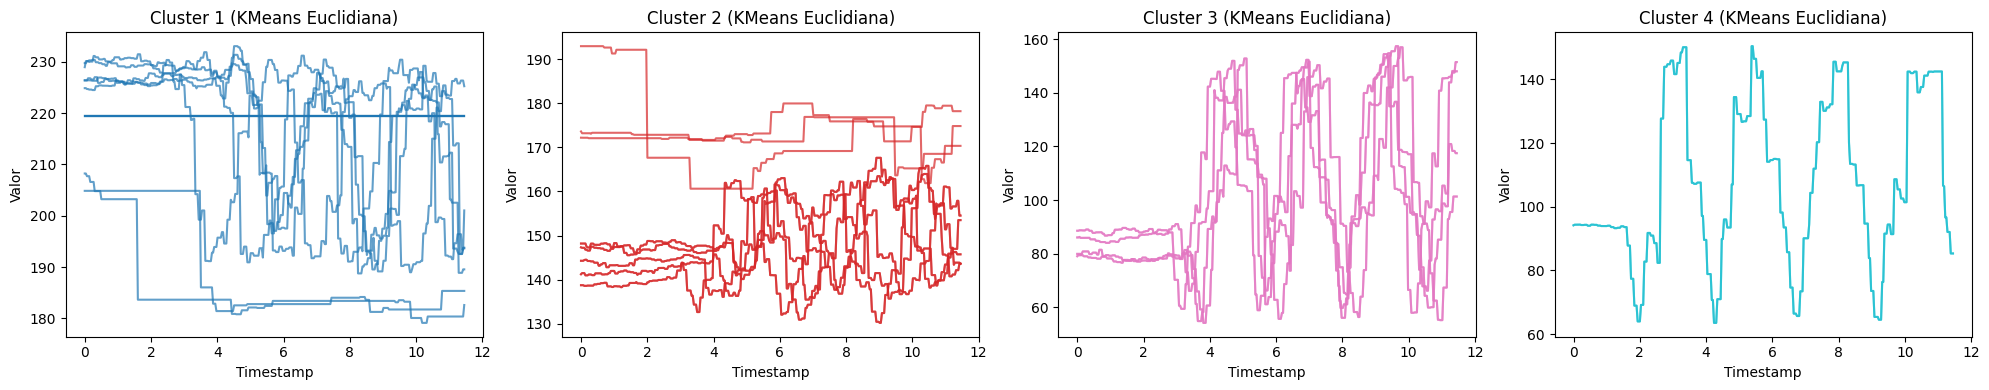

In [131]:
df = df_original.copy()
# timestamp (eixo X)
timestamp = df.iloc[0].values

# séries temporais (linhas 1 a n)
series = df.iloc[1:].values


# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(series)

# Aplicar K-Means
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Criar colormap com n_clusters cores
cmap = cm.get_cmap('tab10', n_clusters)

fig, axes = plt.subplots(1, n_clusters, figsize=(5 * n_clusters, 4), squeeze=False)

for cluster_id in range(n_clusters):
    ax = axes[0][cluster_id]
    indices = np.where(clusters == cluster_id)[0]
    color = cmap(cluster_id)  # cor fixa para o cluster

    for i in indices:
        ax.plot(timestamp, series[i], color=color, alpha=0.7)

    ax.set_title(f'Cluster {cluster_id+1} (KMeans Euclidiana)')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Valor')

plt.tight_layout()
plt.show()

## Bloco 2 - K-Means DTW (tslearn)

C:\Users\Yama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Yama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Yama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Yama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python3

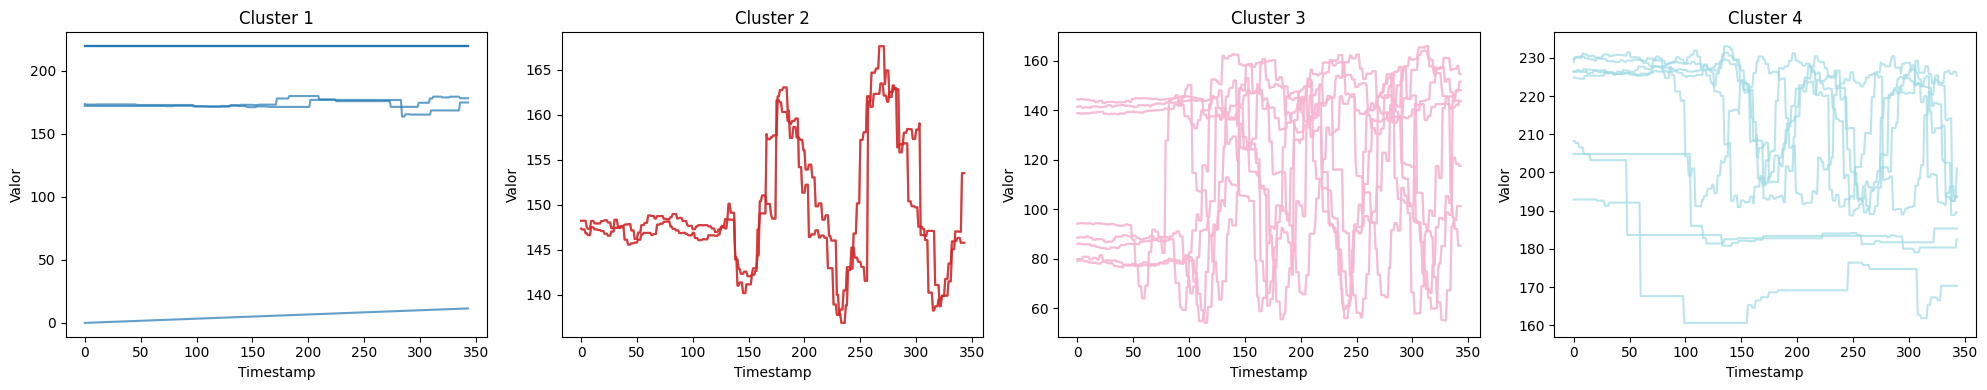

In [130]:
data = df_original.copy()
# Preparar dados: converter para numpy array 3D (samples, timesteps, dim=1)
X_ts = data.values.astype(float)
X_ts = np.expand_dims(X_ts, axis=2)

# Normalizar séries
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X_ts)

n_clusters = 4
km_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=42)
labels = km_dtw.fit_predict(X_scaled)

# Preparar para plotagem
timestamp = data.columns.values
k = n_clusters
cmap = cm.get_cmap('tab20', k)

fig, axes = plt.subplots(1, k, figsize=(5 * k, 4), squeeze=False)

for cluster_id in range(k):
    ax = axes[0][cluster_id]
    indices = np.where(labels == cluster_id)[0]
    color = cmap(cluster_id)
    for i in indices:
        # Aqui plotamos os dados originais (não normalizados) para melhor interpretação visual
        ax.plot(timestamp, data.iloc[i], color=color, alpha=0.7)
    ax.set_title(f'Cluster {cluster_id+1}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Valor')

plt.tight_layout()
plt.show()

## Bloco 3 - Agglomerative clustering com DTW

# Conclusões

Aqui você deve listar todas as conclusões obtidas ao longo do notebook.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.